In [1]:

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

In [2]:
import pandas as pd

In [3]:
!pip install profanity
from profanity import profanity

In [4]:
profanity.contains_profanity("fuck all these people")

True

In [5]:
import praw

reddit = praw.Reddit(
    client_id="IISZRvsPo8OBGV06-x_D1Q",
    client_secret="sX4K-1ciu8fAIer3m0KHMy2riJs0yw",
    user_agent="Python:SIN project:v1.0 (by /u/Mundane_Trick3335)",
)

Version 7.6.1 of praw is outdated. Version 7.7.0 was released Saturday February 25, 2023.


In [6]:
print(reddit.read_only)

True


In [7]:
for submission in reddit.subreddit("test").hot(limit=10):
    print(submission.title)

test
let it be by me active shooter game again 2
let it be by me active shooter game again
2023-04-13 Massachusetts COVID weekly data: 1569 new cases at 3.7% test positivity, 17 new deaths, 287 total individuals hospitalized with COVID
let it be by me
proof of ownership
San Francisco Meteo
San Francisco Meteo
San Francisco Meteo
San Francisco Meteo


In [8]:
prolife_subreddits = [                                         
    "prolife",    
    "MarchForLife",    
    "Abortiondebate",    
    "ProLifeLibertarians",    
    "AbolishAbortion",       
    "StudentsForLife",              
    "RightToLife",                    
    "AbortionRegret",                                
    "RealProLife",           
    "ProLifeMemes",           
    "ProLifeVegan" 
]

In [9]:
pro_choice_subreddits = [                                                   
    "prochoice",    
    "abortion",    
    "PlannedParenthood",    
    "ReproJustice",       
    "BirthControl",                          
    "LateTermAbortion",
    "AbortionAccess",    
    "MyBodyMyChoice",
    "WomenHealthcare",        
    "reproductivejustice",    
    "ReproductiveRights",        
]

In [10]:
mixed = [
    "SocialJustice",    
    "Activism", 
    "Progressive",
    "Abortiondebate",
    "WomensHealth",
    "Healthcare",
    "Feminism",    
    "FeministTheory",
    "EqualRights",
    "TwoXChromosomes",
    "r/PlannedParenthood"
]

In [11]:
combined_list=prolife_subreddits+pro_choice_subreddits+mixed

In [12]:

tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-stance-abortion')
model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-stance-abortion')

In [13]:
def relevant_comment(text):
    keywords = ["pro-life", "pro-choice", "abortion", "fetus", "pregnancy", "reproductive rights", "women's rights", "roe v. wade", "contraception", "termination", "embryo", "planned parenthood", "ultrasound", "adoption", "parental", "consent", "incest", "rape", "maternal", "unsafe", "anti-choice", "healthcare access", "education", "teen pregnancy", "ife", "abortion pill", "late-term", "back-alley", "health"]
    new_keywords = ["heartbeat","brain","conception","ban","child", "access", "reproductive", "healthcare", "women's autonomy", "rights","women", "personhood", "sanctity of life", "conscience clause", "abortion restriction", "procedure","quality","child","children","development","functioning"]
    final_keywords=keywords+new_keywords
    for word in keywords:
        if word in text.lower():
            return True
    return False


In [14]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-stance-abortion')
model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-stance-abortion')

def classify(tok):
    tokens = tokenizer.encode(tok, return_tensors='pt')

    return int(torch.argmax(model(tokens).logits))


def sentiment_score(comment):
    tokens = tokenizer.encode(comment, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [15]:
sentiment_score("My favourite comparison is It's my car, it's my alcohol, I can drive drunk. If you're so worried, drive sober and put on your seatbelt.")

1

In [16]:
file = open('prochoice.txt', 'w+')

In [17]:
combined_list

['prolife',
 'MarchForLife',
 'Abortiondebate',
 'ProLifeLibertarians',
 'AbolishAbortion',
 'StudentsForLife',
 'RightToLife',
 'AbortionRegret',
 'RealProLife',
 'ProLifeMemes',
 'ProLifeVegan',
 'prochoice',
 'abortion',
 'PlannedParenthood',
 'ReproJustice',
 'BirthControl',
 'LateTermAbortion',
 'AbortionAccess',
 'MyBodyMyChoice',
 'WomenHealthcare',
 'reproductivejustice',
 'ReproductiveRights',
 'SocialJustice',
 'Activism',
 'Progressive',
 'Abortiondebate',
 'WomensHealth',
 'Healthcare',
 'Feminism',
 'FeministTheory',
 'EqualRights',
 'TwoXChromosomes',
 'r/PlannedParenthood']

In [18]:
total_choice=0
total_life=0
total_all=0

prochoice_prof=0
prolife_prof=0
nonEcho_prof=0

prochoice_comments=0
prolife_comments=0
neutral_comments=0

# Taking each post from identified subredits and checking for echo chambers

In [19]:
#opening files
with open('prochoice.txt', 'w') as f:
    f.write('')
with open('prolife.txt', 'w') as f:
    f.write('')
with open('mixed.txt', 'w') as f:
    f.write('')

#look at each identified subreddit
for subr in combined_list:
    if subr in pro_choice_subreddits:
        file = open('prochoice.txt', 'a+')
    elif subr in prolife_subreddits:
        file = open('prolife.txt', 'a+')
    else:
        file = open('mixed.txt', 'a+')
    subreddit = reddit.subreddit(subr)
    try:
        print(subreddit.title)
    except:
        continue
    file.write(subreddit.title+"\n")

    #initializing all variables
    non_echo=0
    choice_echo=0
    life_echo=0
    toxic_comm=0
    
    
    i=1
    #look at each submission in subreddit
    for submission in subreddit.hot(limit=10):
        prof_post=0
        total=0
        choice=0
        life=0
        
        file.write("Post "+str(i)+": ")
        tok=submission.title
        if relevant_comment(tok):
            score=sentiment_score(tok[:940])
            total+=1
            if(score==3):
                choice+=1
            elif(score==2):
                life+=1
            if(profanity.contains_profanity(tok)):
                prof_post+=1
        submission.comments.replace_more(limit=None)
        
        #look at each comment of submission
        for top_level_comment in submission.comments:
            tok=top_level_comment.body
            if relevant_comment(tok):
                score=sentiment_score(tok[:940])
                total+=1
                if(score==3):
                    choice+=1
                elif(score==2):
                    life+=1
                if(profanity.contains_profanity(tok)):
                    prof_post+=1
            #look at second level comment of each submission
            for second_level_comment in top_level_comment.replies:
                tok=second_level_comment.body
                if relevant_comment(tok):
                    score=sentiment_score(tok[:940])
                    total+=1
                    if(score==3):
                        choice+=1
                        prochoice_comments+=1
                    elif(score==2):
                        life+=1
                        prolife_comments+=1
                    else:
                        neutral_comments+=1
                    if(profanity.contains_profanity(tok)):
                        prof_post+=1


        #determine if submission is an echo chamber
        if (total!=0):
            file.write(str(choice)+" "+str(life)+" "+str(total)+"\n")
        i+=1
        if choice>1 and float(total-life)/(float(total)) > 0.8:
            choice_echo+=1
            prochoice_prof+=prof_post
        elif life>1 and float(total-choice)/(float(total)) > 0.8:
            life_echo+=1
            prolife_prof+=prof_post
        else:
            non_echo+=1 
            nonEcho_prof+=prof_post

    #write to file and print
    total_choice+=choice_echo
    total_life+=life_echo
    total_all+=life_echo+choice_echo+non_echo
    print("Overall: ",choice_echo,life_echo,non_echo)
    file.write("Overall: "+str(choice_echo)+" Pro-Choice echo chamber, " + str(life_echo)+" Pro-Life echo chambers, "+str(non_echo)+" No echo chambers\n\n")
    file.close()

ProLife
Overall:  3 0 7
March for Life
Overall:  0 2 8
Debating Abortion
Overall:  7 0 3
Pro Life Libertarians
Overall:  1 1 8
AbolishAbortion
Overall:  0 0 10
Students for life
Overall:  0 0 1
Right To Life
Overall:  0 1 9
abortionregret
Overall:  0 0 1
Pro-Life Memes
Overall:  0 1 9
ProLifeVegan
Overall:  0 1 9
Pro-choice
Overall:  3 0 7
abortion
Overall:  5 0 5
PlannedParenthood
Overall:  1 0 9
Reproductive Justice, Health, and Activism
Overall:  0 0 10
All things related to birth control
Overall:  0 0 10
latetermabortion
Overall:  0 0 2
abortion access
Overall:  1 0 2
MyBodyMyChoice
Overall:  0 0 6
WomenHealthCare
Overall:  0 0 10
Reproductive Justice
Overall:  3 0 7
ReproductiveRights
Overall:  0 0 3
Social Justice
Overall:  0 0 10
/r/activism: a place for activists of all types
Overall:  0 0 10
Reddit: Progressive
Overall:  1 0 9
Debating Abortion
Overall:  7 0 3
Women's Health: women's health news, questions and discussion
Overall:  5 0 5
healthcare: systems, costs, problems and

# Taking identified posts and checking for echo chambers

In [20]:
id_list = ["3g1jfi","vl7uxz","uo9q7x","j25kbw","jbexqi","kmrgeg","8xhnzb","6dv5t4","11ssx9c","12f2ju0","1250r33","12elkt9"]
file = open('indiPost.txt', 'w+')
for id in id_list:
    submission = reddit.submission(id=id)
    print(submission.title)
    
    prof_post=0
    total=0
    choice=0
    life=0
    # print("Post",i,end=": ")
    file.write("Post "+str(i)+": "+str(submission.permalink)+"\n")
    tok=submission.title
    if relevant_comment(tok):
        score=sentiment_score(tok[:514])
        total+=1
        if(score==3):
            choice+=1
        elif(score==2):
            life+=1
        if(profanity.contains_profanity(tok)):
            prof_post+=1
    # print(submission.author,":")
    submission.comments.replace_more(limit=None)
    
    for top_level_comment in submission.comments:
        tok=top_level_comment.body
        if relevant_comment(tok):
            score=sentiment_score(tok[:514])
            total+=1
            if(score==3):
                choice+=1
            elif(score==2):
                life+=1
            if(profanity.contains_profanity(tok)):
                prof_post+=1
        # print("\t",top_level_comment.author)
        
        for second_level_comment in top_level_comment.replies:
            tok=second_level_comment.body
            if relevant_comment(tok):
                score=sentiment_score(tok[:514])
                total+=1
                if(score==3):
                    choice+=1
                    prochoice_comments+=1
                elif(score==2):
                    life+=1
                    prolife_comments+=1
                else:
                    neutral_comments+=1
                if(profanity.contains_profanity(tok)):
                    prof_post+=1
    print(choice, life, total)
    if (total!=0):
        file.write(str(choice)+" "+str(life)+" "+str(total)+"\n")
    i+=1
    if choice>1 and float(total-life)/(float(total)) > 0.8:
        choice_echo+=1
        prochoice_prof+=prof_post
    elif life>1 and float(total-choice)/(float(total)) > 0.8:
        life_echo+=1
        prolife_prof+=prof_post


    else:
        non_echo+=1 
        nonEcho_prof+=prof_post
    # total_choice+=choice_echo
    # total_life+=life_echo
    # total_all+=life_echo+choice_echo+non_echo
    # print("Overall: ",choice_echo,life_echo,non_echo)
    # file.write("Overall: "+str(choice_echo)+" Pro-Choice echo chamber, " + str(life_echo)+" Pro-Life echo chambers, "+str(non_echo)+" No echo chambers\n\n")
        

file.close()

Buttons
0 0 4
"My body my choice" has been so harmful to the pro-choice movement
53 19 73
TIL that saying that coat hangers are important symbols for the pro-choice movement is “speaking over other activists”. Women should have a choice over how they protest, just like how they should have a choice about their own bodies.
5 0 5
Women charged police lines and threw Molotov cocktails at officers in Mexico City during protests demanding the legalization of abortion in the majority Roman Catholic country. The protesters, clad in the green bandanas that have become the symbol of the pro-choice movement in Latin America
42 23 71
The Pro-Choice Movement Finds an Under-Recognized Ally: Religious Groups — Many communities of faith view abortion as a ‘moral option,’ not a mortal sin.
13 6 21
In a few hours the Argentine Senate will vote for the legalization of abortion (green is the color of the pro-choice movement in Latin America). We've got high hopes for its approval!
4 0 5
CMV: Abortions ar

In [21]:
print(total_choice,total_life,total_all)
print(prochoice_comments,prolife_comments,neutral_comments)
print(prochoice_prof,prolife_prof,nonEcho_prof)

49 7 266
473 107 104
247 0 65


In [ ]:
print()

In [ ]:
import matplotlib.pyplot as plt

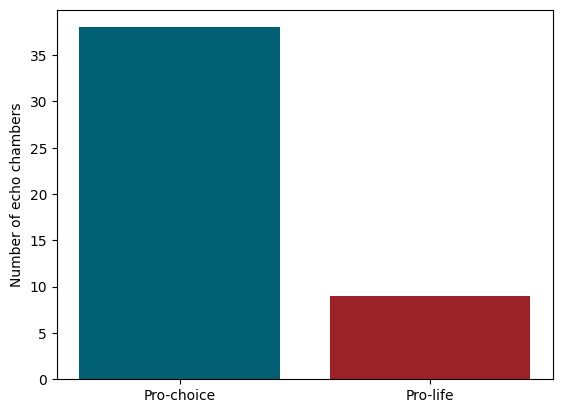

In [ ]:
plt.bar(["Pro-choice","Pro-life"],[total_choice, total_life],color=["#005f73","#9b2226"])
plt.ylabel("Number of echo chambers")
# make this pretty
plt.show()

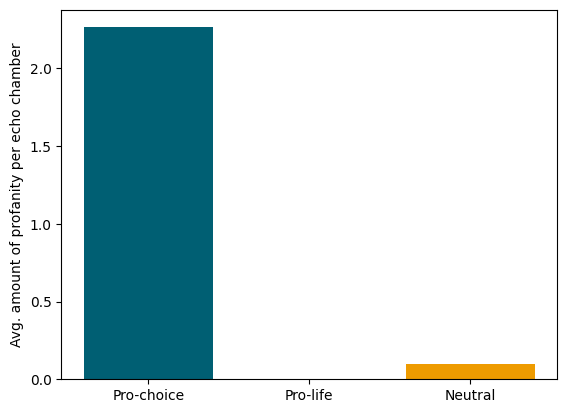

In [ ]:
plt.bar(["Pro-choice","Pro-life","Neutral"],[prochoice_prof/total_choice, prolife_prof/total_life,nonEcho_prof/(total_all-(total_choice+total_life))],color=["#005f73","#9b2226","#ee9b00"])
plt.ylabel("Avg. amount of profanity per echo chamber")
plt.show()